# Money

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_set=train.flow_from_directory('/content/drive/MyDrive/AI(MONEY)/train',target_size = (150,150),batch_size = 12,class_mode = 'categorical')
test_set=validation.flow_from_directory('/content/drive/MyDrive/AI(MONEY)/validation',target_size = (150,150),batch_size = 12,class_mode = 'categorical')        

Found 1158 images belonging to 10 classes.
Found 114 images belonging to 10 classes.


In [ ]:
train_set.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200k': 3,
 '20k': 4,
 '2k': 5,
 '500': 6,
 '500k': 7,
 '50k': 8,
 '5k': 9}

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_104 (Conv2D)         (None, 150, 150, 16)      448       
                                                                 
 conv2d_105 (Conv2D)         (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_106 (Conv2D)         (None, 75, 75, 32)        4640      
                                                                 
 conv2d_107 (Conv2D)         (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_set,batch_size=12,epochs=50,verbose=1,validation_data=test_set)

Epoch 1/50
97/97 [==============================] - 182s 2s/step - loss: 1.5170 - accuracy: 0.4724 - val_loss: 0.9773 - val_accuracy: 0.6842
Epoch 2/50
97/97 [==============================] - 183s 2s/step - loss: 1.1559 - accuracy: 0.6278 - val_loss: 0.6947 - val_accuracy: 0.7632
Epoch 3/50
97/97 [==============================] - 181s 2s/step - loss: 0.4967 - accuracy: 0.8238 - val_loss: 0.4608 - val_accuracy: 0.8421
Epoch 4/50
97/97 [==============================] - 182s 2s/step - loss: 0.1823 - accuracy: 0.9326 - val_loss: 0.0908 - val_accuracy: 0.9649
Epoch 5/50
97/97 [==============================] - 186s 2s/step - loss: 0.1455 - accuracy: 0.9465 - val_loss: 0.5118 - val_accuracy: 0.8596
Epoch 6/50
97/97 [==============================] - 183s 2s/step - loss: 0.2590 - accuracy: 0.9231 - val_loss: 0.0504 - val_accuracy: 1.0000
Epoch 7/50
97/97 [==============================] - 182s 2s/step - loss: 0.0890 - accuracy: 0.9724 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 8/50
97

In [ ]:
model.save('./content/drive/MyDrive/AI_EXAM/Money.h5')

In [ ]:
model = load_model('./content/drive/MyDrive/AI_EXAM/Money.h5')

In [ ]:
score=model.evaluate(test_set,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

10/10 [==============================] - 16s 2s/step - loss: 3.9103e-05 - accuracy: 1.0000
Sai số:  3.91030334867537e-05
Độ chính xác:  1.0


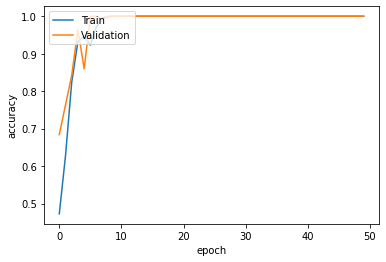

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

20k


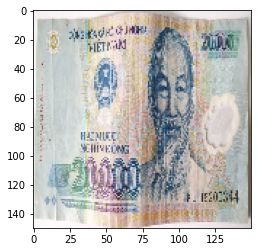

In [ ]:
img=load_img("/content/drive/MyDrive/AI(MONEY)/test/20k1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='1k'
if round(result[0][3])==1:
  prediction='200k'
if round(result[0][4])==1:
  prediction='20k'
if round(result[0][5])==1:
  prediction='2k'
if round(result[0][6])==1:
  prediction='500'
if round(result[0][7])==1:
  prediction='500k'
if round(result[0][8])==1:
  prediction='50k'
if round(result[0][9])==1:
  prediction='5k'
print(prediction)